<a href="https://colab.research.google.com/github/GerardoDario/Algoritmos_No_Supervisados/blob/main/m3_gsb_Proyecto_pra%CC%81ctico_aprendizaje_reforzado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Gerardo Sepúlveda
*   Alumno 2: Gema Zumba
*   Alumno 3: Renzo Fernandez






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
Archivos en el directorio: 
['weights', 'checkpoints', 'logs', 'imgs']


---
### 1.4. Instalar librerías necesarias

In [3]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.9 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654618 sha256=bd8df40fec7c9f032ee8fe12aa8d2dd766ecd885a78b306afa9aae373b6ae4ed
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires cloudpickl

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [4]:
from __future__ import division
import os

from PIL import Image
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute,  MaxPooling2D, GlobalAveragePooling2D, LeakyReLU , BatchNormalization, Dropout, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [5]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4
env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

In [6]:
# Fijar semillas para reproducibilidad
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [7]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

1. Implementación de la red neuronal

In [8]:
#Diccionario de hiperrametros
hiperparametros = {
    "hiperparametro1": {
        'learning_rate': 0.00025,
        'memory_size': 100000,
        'policy_steps': 100000,
        'warmup_steps': 3000 , # acumular transiciones en base a interacciones aleatorias
        'model_update': 10000 ,
        'model_checkpoint_steps': 20000,
        'train_steps': 350000,
        'log_interval': 10000,
        'gamma': 0.99,
        'enable_dueling_network': True,
        'dueling_type': 'avg'
    },
    "hiperparametro1_g": { # Probar cambiar hp, arquitectura de red -> menos params para ejecutar mas rapido
        'learning_rate': 0.0001,
        'memory_size': 120000, # aumentar banco de memoria
        'policy_steps': 100000,
        'warmup_steps': 3500 , # acumular transiciones en base a interacciones aleatorias, probar con mas o menos
        'model_update': 10000 ,
        'model_checkpoint_steps': 20000,
        'train_steps': 350000,
        'log_interval': 10000,
        'gamma': 0.99,
        'enable_dueling_network': True,
        'dueling_type': 'avg'
    },

    "hiperparametro1_g2": { # Probar cambiar hp, arquitectura de red -> menos params para ejecutar mas rapido
        'learning_rate': 0.0001,
        'memory_size': 200000, # aumentar banco de memoria
        'policy_steps': 100000,
        'warmup_steps': 5000 , # acumular transiciones en base a interacciones aleatorias, probar con mas o menos
        'model_update': 10000 ,
        'model_checkpoint_steps': 20000,
        'train_steps': 350000,
        'log_interval': 10000,
        'gamma': 0.99,
        'enable_dueling_network': True,
        'dueling_type': 'avg'
    },

    "hiperparametro2": {
        'learning_rate': 0.0001,
        'memory_size': 60000,
        'policy_steps': 100000,
        'warmup_steps': 3000 ,
        'model_update': 10000 ,
        'model_checkpoint_steps': 20000,
        'train_steps': 350000,
        'log_interval': 10000,
        'gamma': 0.99,
        'enable_dueling_network': True,
        'dueling_type': 'avg'
    },
        "hiperparametro3": {
        'learning_rate': 0.003,
        'memory_size': 75000,
        'policy_steps': 900,
        'warmup_steps': 75,
        'model_update': 25,
        'model_checkpoint_steps': 700,
        'train_steps': 15000,
        'log_interval': 100,
        'gamma': 0.90,
        'enable_dueling_network': True,
        'dueling_type': 'min'
    },
        "hiperparametro4": {
        'learning_rate': 0.0004,
        'memory_size': 80000,
        'policy_steps': 1000000,
        'warmup_steps': 5000,
        'model_update': 50,
        'model_checkpoint_steps': 800,
        'train_steps': 180000,
        'log_interval': 20000,
        'gamma': 0.85,
        'enable_dueling_network': True,
        'dueling_type': 'max'

    },
        "hiperparametro5": {
        'learning_rate': 0.005,
        'memory_size': 85000,
        'policy_steps': 1100,
        'warmup_steps': 90,
        'model_update': 35,
        'model_checkpoint_steps': 900,
        'train_steps': 20000,
        'log_interval': 150,
        'gamma': 0.80,
        'enable_dueling_network': True,
        'dueling_type': 'max'
    },
         "hiperparametro6": {
        'learning_rate': 0.006,
        'memory_size': 90000,
        'policy_steps': 1200,
        'warmup_steps': 100,
        'model_update': 40,
        'model_checkpoint_steps': 1000,
        'train_steps': 22000,
        'log_interval': 175,
        'gamma': 0.75,
        'enable_dueling_network': False,
        'dueling_type': 'min'
    },

}

In [9]:
# Función para actualizar las variables según los hiperparámetros actuales
def actualizar_variables(hiperparametros):
    global LEARNING_RATE, MEMORY_SIZE, POLICY_STEPS, WARMUP_STEPS, MODEL_UPDATE, \
           MODEL_CHECKPOINT_STEPS, TRAIN_STEPS, LOG_INTERVAL, GAMMA, DUELING, DUELING_TYPE

    LEARNING_RATE = np.float32(hiperparametros['learning_rate'])
    MEMORY_SIZE = int(hiperparametros['memory_size'])
    POLICY_STEPS = np.int32(hiperparametros['policy_steps'])
    WARMUP_STEPS = np.int32(hiperparametros['warmup_steps'])
    MODEL_UPDATE = np.int32(hiperparametros['model_update'])
    MODEL_CHECKPOINT_STEPS = np.int32(hiperparametros['model_checkpoint_steps'])
    TRAIN_STEPS = np.int32(hiperparametros['train_steps'])
    LOG_INTERVAL = np.int32(hiperparametros['log_interval'])
    GAMMA = np.float32(hiperparametros['gamma'])
    DUELING = bool(hiperparametros['enable_dueling_network'])
    DUELING_TYPE = str(hiperparametros['dueling_type'])

In [10]:
print("El tamaño del espacio de acciones es: ",nb_actions," y son las siguientes:")
print("Formato de las observaciones:", env.observation_space)

El tamaño del espacio de acciones es:  6  y son las siguientes:
Formato de las observaciones: Box(0, 255, (210, 160, 3), uint8)


In [11]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

2. Implementación de la solución DQN

In [12]:
# actualiza los parámetros
# Actualizar las variables con los hiperparámetros del modelo que desea, modehiperparametro1, hiperparametro2, modelohiperparametro3
actualizar_variables(hiperparametros["hiperparametro1_g2"]) # hiperparametro1_g, hiperparametro1
# Imprimir las variables actualizadas
print("LEARNING_RATE:", LEARNING_RATE)
print("MEMORY_SIZE:", MEMORY_SIZE)
print("POLICY_STEPS:", POLICY_STEPS)
print("WARMUP_STEPS:", WARMUP_STEPS)
print("MODEL_UPDATE:", MODEL_UPDATE)
print("MODEL_CHECKPOINT_STEPS:", MODEL_CHECKPOINT_STEPS)
print("TRAIN_STEPS:", TRAIN_STEPS)
print("LOG_INTERVAL:", LOG_INTERVAL)
print("GAMMA:", GAMMA)
print("DUELING:", DUELING)
print("DUELING_TYPE:", DUELING_TYPE)

LEARNING_RATE: 1e-04
MEMORY_SIZE: 200000
POLICY_STEPS: 100000
WARMUP_STEPS: 5000
MODEL_UPDATE: 10000
MODEL_CHECKPOINT_STEPS: 20000
TRAIN_STEPS: 350000
LOG_INTERVAL: 10000
GAMMA: 0.99
DUELING: True
DUELING_TYPE: avg


In [13]:
# Testing part to calculate the mean reward
#weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
#dqn.load_weights(weights_filename)
#dqn.test(env, nb_episodes=10, visualize=False)

In [14]:
# actualiza los parámetros
actualizar_variables(hiperparametros["hiperparametro1_g2"])

In [15]:
model_name = 'm2'
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(nb_actions))
model.add(Activation('linear'))
model.summary()

channels_last
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 activation (Activation)     (None, 20, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 activation_1 (Activation)   (None, 9, 9, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 activation_2 (Activation)   (None, 7, 7, 

In [16]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)

# si hay bastante estocasticidad empezar con una esp 0.3 para converger mas rapido
# reducir steps totales
# aumentar steps de warmup para tener buena memoria inicial

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1.0, value_min=0.1,
                              value_test=0.05,
                              nb_steps=POLICY_STEPS)
processor = AtariProcessor()

In [17]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,
               gamma=GAMMA,
               target_model_update=MODEL_UPDATE,
               train_interval=4,
               enable_dueling_network=DUELING,
               dueling_type=DUELING_TYPE)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [18]:
# Define the paths for weights, checkpoints, and logs
WEIGHTS_PATH = 'weights/'
CHECKPOINT_PATH = 'checkpoints/'
LOGS_PATH = 'logs/'

os.makedirs(WEIGHTS_PATH, exist_ok=True)
os.makedirs(CHECKPOINT_PATH, exist_ok=True)
os.makedirs(LOGS_PATH, exist_ok=True)

# Definir rutas y nombres de archivo
weights_filename = WEIGHTS_PATH  + 'm3_dqn_{}_weights.h5f'.format(env_name)
checkpoint_weights_filename = CHECKPOINT_PATH  + 'm3_dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'm3_dqn_{}_log.json'.format(env_name)

# Configurar callbacks
callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=LOG_INTERVAL)]

# Imprimir nombres de archivo para verificación
print(weights_filename)
print(checkpoint_weights_filename)
print(log_filename)

weights/m3_dqn_SpaceInvaders-v0_weights.h5f
checkpoints/m3_dqn_SpaceInvaders-v0_weights_{step}.h5f
logs/m3_dqn_SpaceInvaders-v0_log.json


In [19]:
dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False, verbose=1)

Training for 350000 steps ...
Interval 1 (0 steps performed)
   24/10000 [..............................] - ETA: 45s - reward: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 185s 18ms/step - reward: 0.0141
15 episodes - episode_reward: 9.133 [3.000, 15.000] - loss: 0.007 - mae: 0.054 - mean_q: 0.075 - mean_eps: 0.932 - ale.lives: 2.161

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 319s 32ms/step - reward: 0.0133
16 episodes - episode_reward: 8.562 [4.000, 14.000] - loss: 0.006 - mae: 0.067 - mean_q: 0.094 - mean_eps: 0.865 - ale.lives: 2.095

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 318s 32ms/step - reward: 0.0144
14 episodes - episode_reward: 9.786 [4.000, 24.000] - loss: 0.006 - mae: 0.092 - mean_q: 0.125 - mean_eps: 0.775 - ale.lives: 2.097

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 320s 32ms/step - reward: 0.0148
12 episodes - episode_reward: 12.250 [7.000, 17.000] - loss: 0.006 - mae: 0.111 - mean_q: 0.147 - mean_eps: 0.685 - ale.lives: 2.073

Interval 5 (40000 steps performed)
10000/10000

In [20]:
# Guardar los pesos finales del modelo
try:
    dqn.save_weights(weights_filename, overwrite=True)
    print("Pesos guardados exitosamente.")
except Exception as e:
    print(f"Error al guardar los pesos: {e}")

Pesos guardados exitosamente.


In [21]:
# Prueba del agente
dqn.load_weights(weights_filename.format(env_name))
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 21.000, steps: 887
Episode 2: reward: 20.000, steps: 945
Episode 3: reward: 28.000, steps: 1041
Episode 4: reward: 12.000, steps: 555
Episode 5: reward: 18.000, steps: 793
Episode 6: reward: 9.000, steps: 409
Episode 7: reward: 22.000, steps: 873
Episode 8: reward: 11.000, steps: 650
Episode 9: reward: 12.000, steps: 620
Episode 10: reward: 20.000, steps: 870


In [22]:
log_filename = LOGS_PATH + f'dqn_{env_name}_log.json'
log_filename

'logs/dqn_SpaceInvaders-v0_log.json'

In [23]:
def graph_training(env_name, model_name, variable='mean_q'):
    log_filename = LOGS_PATH + f'm3_dqn_{env_name}_log.json'
    try:
        with open(log_filename) as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: El archivo {log_filename} no se encontró.")
        return
    except json.JSONDecodeError:
        print(f"Error: No se pudo decodificar el archivo JSON {log_filename}.")
        return
    try:
        values = data[variable]
    except KeyError:
        print(f"Error: La clave '{variable}' no se encontró en el archivo JSON.")
        return

    plt.figure(figsize=(10, 6))
    pd.DataFrame(values).plot(title=f"{model_name}: Evolución - {variable}", legend=False)
    plt.xlabel('Steps')
    plt.ylabel(variable.replace('_', ' ').title())
    os.makedirs('imgs', exist_ok=True)
    output_path = os.path.join('imgs', f'{model_name}_{env_name}_{variable}.png')
    plt.savefig(output_path)
    plt.show()

In [24]:
env_name

'SpaceInvaders-v0'

In [25]:
model_name

'm2'

<Figure size 1000x600 with 0 Axes>

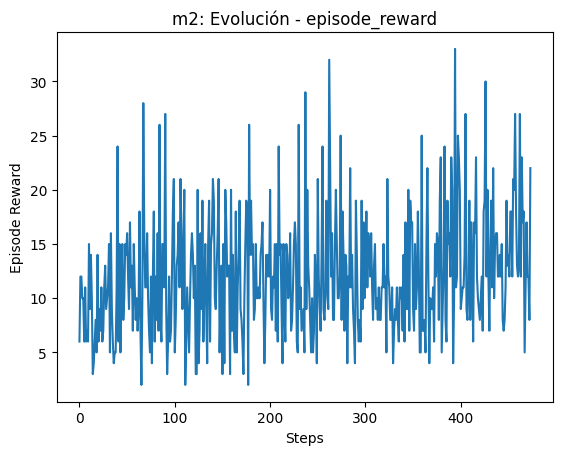

<Figure size 1000x600 with 0 Axes>

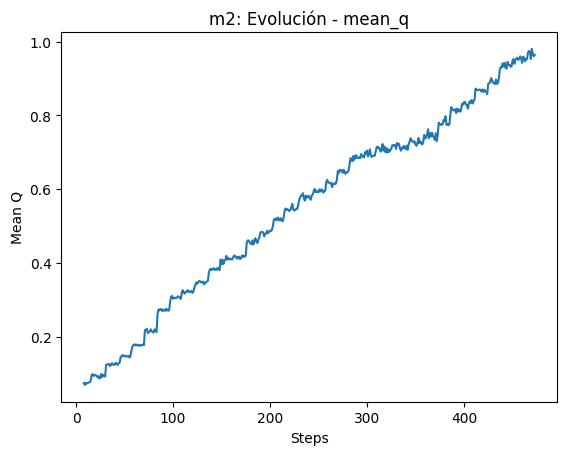

In [26]:
# Gráfico de evolución del entrenamiento
graph_training(env_name, model_name, variable='episode_reward')
graph_training(env_name, model_name, variable='mean_q')

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---